<a href="https://colab.research.google.com/github/celsosoaresss/ML/blob/main/Classifica%C3%A7%C3%A3o_Qualidade_De_Sono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#carregar os dados
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')


#transformando os valores das colunas em dados numéricos
classification = {'Male' : 0, 'Female': 1}
df['Gender'] = df['Gender'].map(classification)

classification = {'None' : 0, 'Sleep Apnea': 1, 'Insomnia' :2}
df['Sleep Disorder'] = df['Sleep Disorder'].map(classification)

classification = {'Overweight' : 0, 'Normal': 1, 'Obese': 2,}
df['BMI Category'] = df['BMI Category'].map(classification)



#dividir a pressão arterial em duas colunas
df['Blood_Pressure_Systolic'] = df['Blood Pressure'].apply(lambda x: 5*round(1/5*int(x.split('/')[0])))
df['Blood_Pressure_Diastolic'] = df['Blood Pressure'].apply(lambda x: 5*round(1/5*int(x.split('/')[1])))

# Remover linhas com valores NaN na coluna 'BMI Category'
df.dropna(subset=['BMI Category'], inplace=True)

#apagar colunas
df.drop('Person ID', axis = 1, inplace = True)
df.drop('Occupation', axis = 1, inplace = True)
df.drop('Blood Pressure', axis = 1, inplace = True)
df.head( )

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure_Systolic,Blood_Pressure_Diastolic
0,0,27,6.1,6,42,6,0.0,77,4200,0,125,85
1,0,28,6.2,6,60,8,1.0,75,10000,0,125,80
2,0,28,6.2,6,60,8,1.0,75,10000,0,125,80
3,0,28,5.9,4,30,8,2.0,85,3000,1,140,90
4,0,28,5.9,4,30,8,2.0,85,3000,1,140,90


In [ ]:
contagem_classes = df['Sleep Disorder'].value_counts()
contagem_classes

0    202
1     76
2     75
Name: Sleep Disorder, dtype: int64

In [ ]:
df.shape

(353, 12)

In [ ]:
#separar X e y
X = df.drop('Sleep Disorder', axis = 1) #todas as colunas menos a "diagnosis_result"
y = df['Sleep Disorder'].values #ou df['diagnosis_result'].values

print(X.shape, y.shape)

(353, 11) (353,)


In [ ]:
#separando a base de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(282, 11) (71, 11) (282,) (71,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        47
           1       0.69      0.75      0.72        12
           2       0.55      0.50      0.52        12

    accuracy                           0.75        71
   macro avg       0.68      0.69      0.68        71
weighted avg       0.74      0.75      0.75        71



<Axes: >

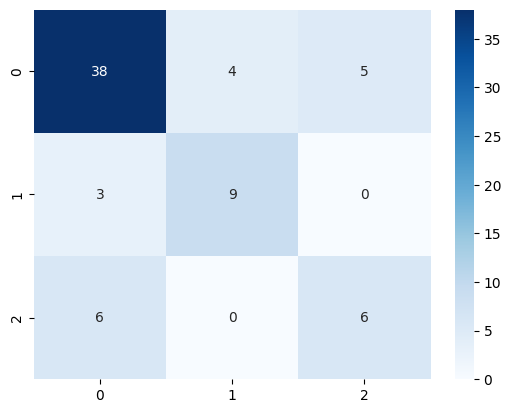

In [ ]:
#Regressão Logística
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.83      0.83      0.83        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        71
   macro avg       0.93      0.91      0.92        71
weighted avg       0.94      0.94      0.94        71



<Axes: >

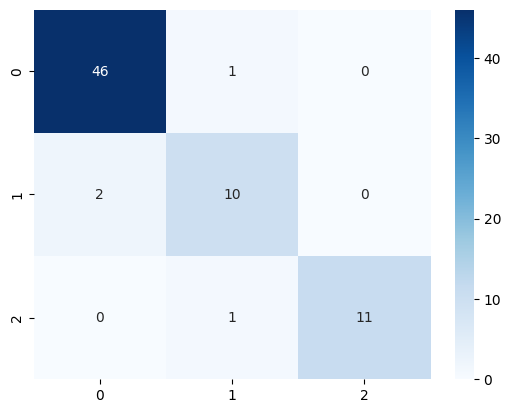

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        47
           1       1.00      0.42      0.59        12
           2       0.00      0.00      0.00        12

    accuracy                           0.73        71
   macro avg       0.57      0.47      0.47        71
weighted avg       0.64      0.73      0.65        71



<Axes: >

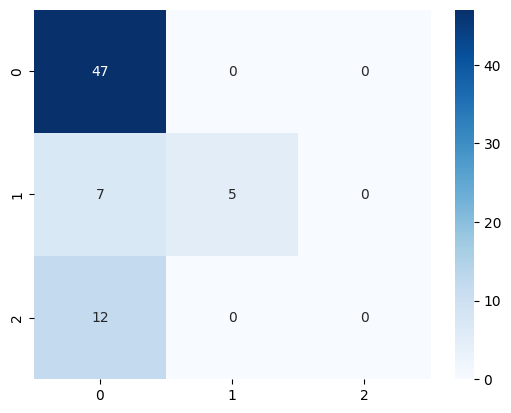

In [ ]:
#svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.86      0.92        14
           2       0.92      0.85      0.88        13

    accuracy                           0.94        71
   macro avg       0.95      0.90      0.92        71
weighted avg       0.95      0.94      0.94        71



<Axes: >

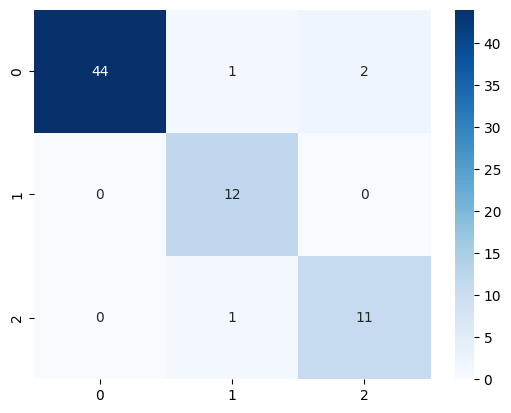

In [ ]:
#desision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        47
           1       0.50      0.08      0.14        12
           2       0.00      0.00      0.00        12

    accuracy                           0.68        71
   macro avg       0.39      0.36      0.32        71
weighted avg       0.54      0.68      0.56        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

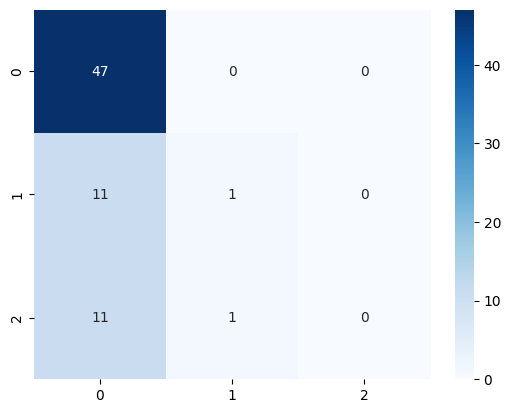

In [ ]:
#mlp
from sklearn.neural_network import MLPClassifier

model = MLPClassifier() #max_iter = 1500 maximo de interações
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")